In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('..\Data-raw\Fertilizer_recommendation.csv')
data.head()

,Temparature,Humidity,Soil Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [9]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [10]:
data.columns

Index(['Temparature', 'Humidity', 'Soil Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [11]:
data["Soil Type"].unique()




array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

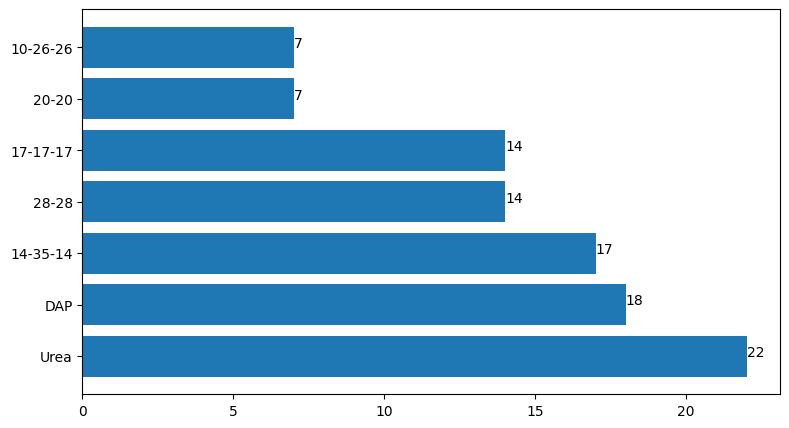

In [12]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

<Axes: >

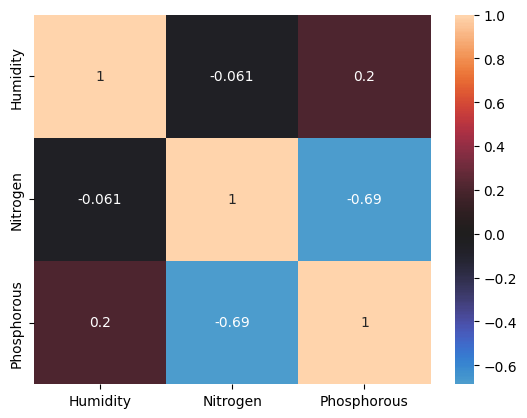

In [13]:
continuous_data_cols = ["Humidity", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

# Check for any missing data in the continuous columns
if data[continuous_data_cols].isnull().values.any():
    print("There are missing values in the continuous data columns.")

# Check for any missing data in the categorical columns
if data[categorical_data_cols].isnull().values.any():
    print("There are missing values in the categorical data columns.")

# Generate the heatmap
sns.heatmap(data[continuous_data_cols].corr(), center=0, annot=True)

In [14]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [15]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [16]:
from sklearn.preprocessing import LabelEncoder

def encode_soil_types(original_soil_types, new_soil_type):
   
    soil_type_label_encoder = LabelEncoder().fit(original_soil_types)
    encoded_soil_type = soil_type_label_encoder.transform([new_soil_type])
    return encoded_soil_type[0]

def decode_soil_types(original_soil_types, encoded_soil_value):
    soil_type_label_encoder = LabelEncoder().fit(original_soil_types)
    decoded_soil_type = soil_type_label_encoder.inverse_transform([encoded_soil_value])
    return decoded_soil_type[0]

# Example original data (replace with your actual data)
original_soil_types = ['Clay', 'Sandy', 'Loam', 'Peat', 'Chalk']

# Encode a new soil type
new_customer_soil_type = 'Loam'
encoded_value = encode_soil_types(original_soil_types, new_customer_soil_type)
print(encoded_value)

# Decode the encoded value
decoded_value = decode_soil_types(original_soil_types, encoded_value)
print(f"Decoded value: {decoded_value}")


2
Decoded value: Loam


In [17]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [18]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [19]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [20]:
def encode_crop_types(original_crop_types, new_crop_type):

    crop_type_label_encoder = LabelEncoder().fit(original_crop_types)
    encoded_crop_type = crop_type_label_encoder.transform([new_crop_type])
    return encoded_crop_type[0]

original_crop_types = ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
                       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']

# Encode a new crop type
new_crop_type = 'Wheat'
encoded_value = encode_crop_types(original_crop_types, new_crop_type)
print(f"Encoded value for '{new_crop_type}': {encoded_value}")

Encoded value for 'Wheat': 10


In [21]:
data.head()

,Temparature,Humidity,Soil Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [22]:
data['Soil Type'].value_counts()

Soil Type
2    21
4    20
1    20
0    19
3    19
Name: count, dtype: int64

In [23]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [24]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 4: 17, 1: 14, 3: 14, 2: 7, 0: 7})

In [25]:
from imblearn.over_sampling import SMOTE
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [26]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [27]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 3)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


**K-NEAREST NEIGHBORS (KNN)**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predicted = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

KNN Accuracy is:  90.32258064516128
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00         4
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



**SUPPORT VECTOR MACHINE (SVM)**

In [31]:
from sklearn.svm import SVC

In [32]:
SVC = SVC(probability=True)
SVC.fit(X_train,y_train)
predicted = SVC.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('SVC')
print("SVC Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

SVC Accuracy is:  90.32258064516128


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00         4
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



**RANDOM  FOREST CLASSIFIER**

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_test

array([[29, 58, 43,  1,  6, 24,  0, 18],
       [32, 62, 34,  3,  9, 22,  0, 20],
       [30, 60, 27,  2,  8, 12,  0, 40],
       [26, 52, 44,  4,  3, 23,  0, 20],
       [31, 62, 49,  0,  8, 10, 13, 14],
       [28, 57, 32,  0,  4,  9,  7, 30],
       [29, 58, 61,  2,  1, 11,  0, 38],
       [25, 50, 64,  3,  1,  9,  0, 10],
       [33, 64, 44,  1,  6,  6, 19, 20],
       [36, 68, 62,  3,  1, 15,  0, 40],
       [36, 68, 50,  2, 10, 12, 18, 19],
       [25, 50, 26,  3,  2, 15, 14, 11],
       [36, 68, 41,  3,  2, 41,  0,  0],
       [30, 60, 47,  4,  0, 12,  0, 42],
       [27, 54, 58,  1,  8, 10,  0,  9],
       [27, 54, 30,  1,  7, 13,  0, 13],
       [34, 65, 48,  2, 10, 23,  0, 19],
       [25, 51, 55,  1,  8, 10, 13, 14],
       [29, 58, 47,  1,  6,  8,  9, 26],
       [32, 62, 34,  3,  9, 22,  0, 24],
       [34, 65, 60,  0,  8, 35,  0,  0],
       [30, 60, 62,  2,  1,  8,  9, 29],
       [30, 60, 42,  4,  4, 10,  0, 10],
       [30, 60, 47,  4,  3, 22,  0, 21],
       [26, 52, 

In [35]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [45]:
X_test[0]


array([29, 58, 43,  1,  6, 24,  0, 18], dtype=int64)

**XG BOOST CLASSIFIER**

In [37]:
import xgboost as xgb

In [38]:
XB = xgb.XGBClassifier(eval_metric='mlogloss')
XB.fit(X_train,y_train)
predicted = XB.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('XG Boost Accuracy is ',x * 100)
print(classification_report(y_test,predicted))

XG Boost Accuracy is  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



**ACCURACY COMPARISION**

<Axes: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

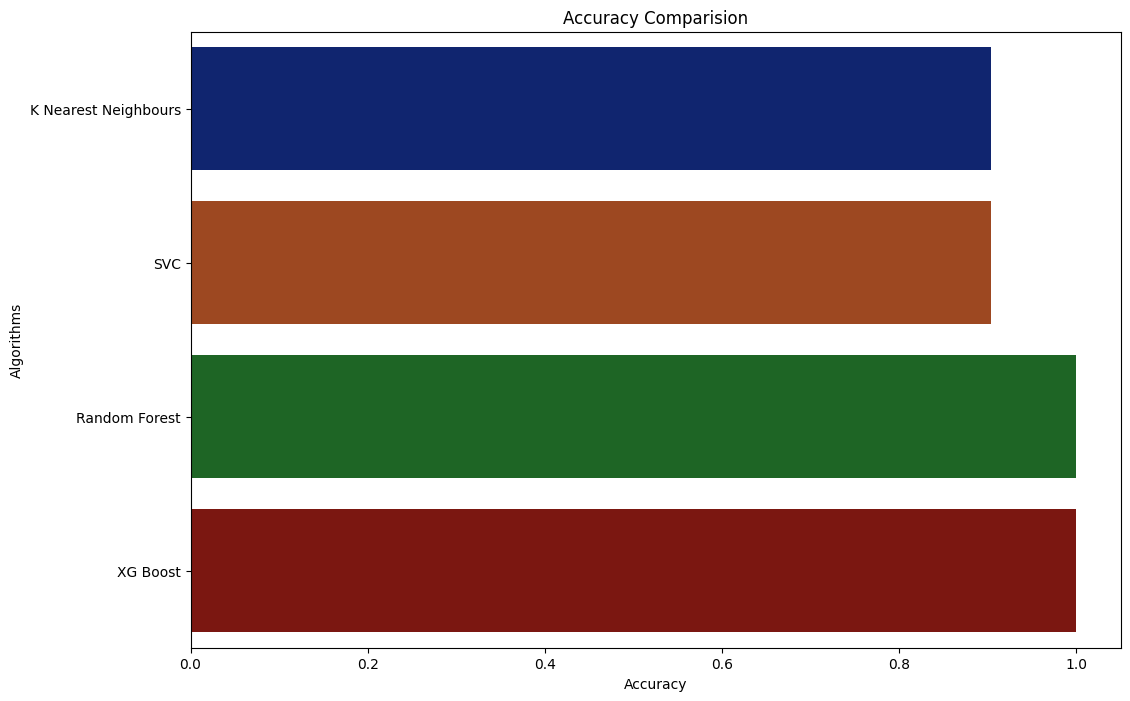

In [39]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [40]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

K Nearest Neighbours --> 90.32258064516128 %
SVC --> 90.32258064516128 %
Random Forest --> 100.0 %
XG Boost --> 100.0 %


**CONCLUSION**

We are using Random Forest Classifier because of its accuracy and precision

In [41]:
import pickle
# Dump the trained RandomForest 
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()